In [13]:
# https://gist.github.com/orlp/0c5fc7264f02e3d211d42da643163bb7
import numpy as np

def expected_time_to_solve(N):
    A = np.zeros((4*(N+2), 4*(N+2)))
    # (n, forward) => (4n + 0), (n, backward) => (4n + 1), (n, inside) => (4n + 2), (n, facewall) => (4n + 3)
    for i in range(4*(N+2)):
        if i < 4:
            A[i,4] = 1
        elif i >= 4*(N+1):
            A[i,i] = 1
        elif i % 4 == 0:
            A[i,i+2] = 3/4
            A[i,i+4] = 1/4
        elif i % 4 == 1:
            A[i,i+1] = 1/4
            A[i,i-4] = 3/4
        elif i % 4 == 2:
            A[i,i+1] = 1
        elif i % 4 == 3:
            A[i, i+1] = 1/2
            A[i, i+2-8] = 1/2
        else:
            raise RuntimeError("non-exhaustive Markov chain")

    Q = A[:4*(N+1),:4*(N+1)]
    x = np.linalg.inv(np.eye(4*(N+1)) - Q)
    return np.sum(x[0])


xs, ys = [], []
for N in range(10,201, 10):
    xs.append(N)
    ys.append(expected_time_to_solve(N))

0.33661812995590124 2.987699071618202 0.9999995002848103 1.845215818142261e-55 7.931908330807514e-05
1.4002042655686937


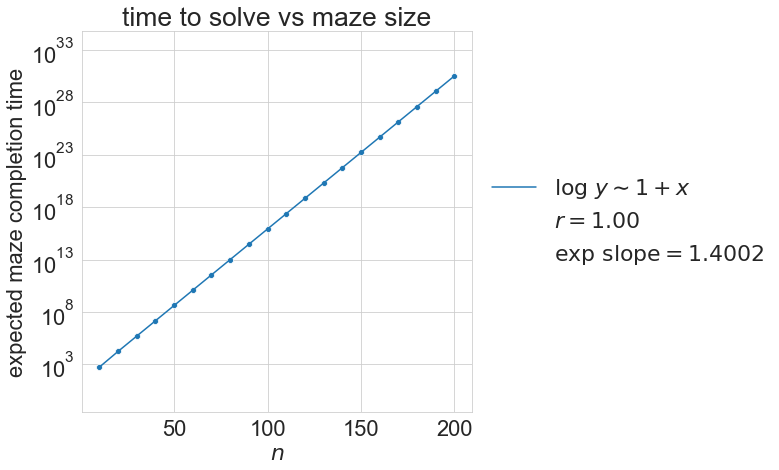

In [27]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 22})

data = pd.DataFrame(data={r'$n$': xs, 'expected maze completion time': ys})
f, ax = plt.subplots(figsize=(7, 7))
ax.set(yscale="log")
sns.scatterplot(r"$n$", "expected maze completion time", data=data, ax=ax)#, scatter_kws={"s": 100})
plt.title('time to solve vs maze size')

from scipy.stats import linregress
from matplotlib.patches import Rectangle

slope, intercept, rvalue, pvalue, stderr = linregress(xs, np.log(ys))
print(slope, intercept, rvalue, pvalue, stderr)
print(np.exp(slope))
plt.plot(xs, ys, label=r'$\log\ y\sim 1 + x$')
handles, labels = plt.gca().get_legend_handles_labels()
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
handles += [extra,extra]
labels += [r'$r={:.2f}$'.format(rvalue),
          r'$\exp\ \mathrm{{slope}}={:.4f}$'.format(np.exp(slope))]
plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1, .5), ncol=1, frameon=False)
plt.savefig('tts.png',  bbox_inches='tight')
plt.show()